# Triangulation analysis with world coordinates (Fundamental Matrix)
## Usage
This code will go through the analysis of the 3d scenes we have both in controlled setting and real setting, to investigate the 3D reconstruction efficacy of pose estimated keypoints

## Package installation
- You will need [GUI backend](https://matplotlib.org/faq/usage_faq.html#what-is-a-backend) to enable interactive plots in `matplotlib`.
- `numpy`
- `PIL`

#### Common imports

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

#### Part 1: Prepare some functions

In [2]:
def get_residual(F, p1, p2):
    """
    Function to compute the residual average residual on frame 2
    param: F (3x3): fundamental matrix: (pt in frame 2).T * F * (pt in frame 1) = 0
    param: p1 (Nx2): 2d points on frame 1
    param: p2 (Nx2): 2d points on frame 2
    """
    P1 = np.c_[p1, np.ones((p1.shape[0],1))].transpose()
    P2 = np.c_[p2, np.ones((p2.shape[0],1))].transpose()
    L2 = np.matmul(F, P1).transpose()
    L2_norm = np.sqrt(L2[:,0]**2 + L2[:,1]**2)
    L2 = L2 / L2_norm[:,np.newaxis]
    pt_line_dist = np.multiply(L2, P2.T).sum(axis = 1)
    return np.mean(np.square(pt_line_dist))

def plot_fundamental(ax, F, p1, p2, I):
    """
    Function to display epipolar lines and corresponding points
    param: F (3x3): fundamental matrix: (pt in frame 2).T * F * (pt in frame 1) = 0
    param: p1 (Nx2): 2d points on frame 1
    param: p2 (Nx2): 2d points on frame 2
    param: I: frame 2
    """
    N = p1.shape[0]
    P1 = np.c_[p1, np.ones((N,1))].transpose()
    P2 = np.c_[p2, np.ones((N,1))].transpose()
    L2 = np.matmul(F, P1).transpose() # transform points from 

    # the first image to get epipolar lines in the second image
    L2_norm = np.sqrt(L2[:,0]**2 + L2[:,1]**2)
    L2 = L2 / L2_norm[:,np.newaxis]
    pt_line_dist = np.multiply(L2, P2.T).sum(axis=1)
    closest_pt = p2 - (L2[:,0:2]*pt_line_dist[:,np.newaxis])

    # Find endpoints of segment on epipolar line (for display purposes).
    # offset from the closest point is 10 pixels
    pt1 = closest_pt - np.c_[L2[:,1], -L2[:,0]]*10
    pt2 = closest_pt + np.c_[L2[:,1], -L2[:,0]]*10

    # Display points and segments of corresponding epipolar lines.
    # You will see points in red corsses, epipolar lines in green 
    # and a short cyan line that denotes the shortest distance between
    # the epipolar line and the corresponding point.
    ax.set_aspect('equal')
    ax.imshow(np.array(I))
    ax.plot(p2[:,0],p2[:,1],  '+r')
    ax.plot([p2[:,0], closest_pt[:,0]],[p2[:,1], closest_pt[:,1]], 'r')
    ax.plot([pt1[:,0], pt2[:,0]],[pt1[:,1], pt2[:,1]], 'g')
# write your code here for part estimating essential matrices
def fit_fundamental(matches):
    """
    Solves for the fundamental matrix using the matches with unnormalized method.
    param matches: N by 4 matrix where each row is [x, y, x', y']
    """
    # <YOUR CODE>
    
    # p1 = np.c_[p1, np.c_[p1, p1]] 
    # p2 = np.c_[p2, np.c_[p2, p2]]
    # print(p1.shape) # N by 9 
    # print(p2.shape) # N by 9


    # #[u'u, u'v, u', v'u, v'v, v', u, v, 1] ==> A
    # A = np.array([[p2[0, 0]*p1[0, 0], p2[0, 0]*p1[0, 1], p2[0, 0], p2[0,1]*p1[0,0], p2[0,1]*p1[0,1], p2[0,1], p1[0,0], p1[0,1], 1],
    #               [p2[1, 0]*p1[1, 0], p2[1, 0]*p1[1, 1], p2[1, 0], p2[1,1]*p1[1,0], p2[1,1]*p1[1,1], p2[1,1], p1[1,0], p1[1,1], 1],
    #               [p2[2, 0]*p1[2, 0], p2[2, 0]*p1[2, 1], p2[2, 0], p2[2,1]*p1[2,0], p2[2,1]*p1[2,1], p2[2,1], p1[2,0], p1[2,1], 1],
    #               [p2[3, 0]*p1[3, 0], p2[3, 0]*p1[3, 1], p2[3, 0], p2[3,1]*p1[3,0], p2[3,1]*p1[3,1], p2[3,1], p1[3,0], p1[3,1], 1],
    #               [p2[4, 0]*p1[4, 0], p2[4, 0]*p1[4, 1], p2[4, 0], p2[4,1]*p1[4,0], p2[4,1]*p1[4,1], p2[4,1], p1[4,0], p1[4,1], 1],
    #               [p2[5, 0]*p1[5, 0], p2[5, 0]*p1[5, 1], p2[5, 0], p2[5,1]*p1[5,0], p2[5,1]*p1[5,1], p2[5,1], p1[5,0], p1[5,1], 1],
    #               [p2[6, 0]*p1[6, 0], p2[6, 0]*p1[6, 1], p2[6, 0], p2[6,1]*p1[6,0], p2[6,1]*p1[6,1], p2[6,1], p1[6,0], p1[6,1], 1],
    #               [p2[7, 0]*p1[7, 0], p2[7, 0]*p1[7, 1], p2[7, 0], p2[7,1]*p1[7,0], p2[7,1]*p1[7,1], p2[7,1], p1[7,0], p1[7,1], 1]])
    
    #select 8 random points from the matches? 
    # np.random.shuffle(matches)
    # eight_points = matches[:8, :] # 8 by 4
    p1 = np.c_[matches[:, :2], np.ones((matches.shape[0],1))] #get points from img1 N by 2
    p2 = np.c_[matches[:, 2:], np.ones((matches.shape[0],1))] #get points from img2 N by 2
    u = p1[:,0]
    uprime = p2[:, 0]
    v = p1[:,1]
    vprime = p2[:, 1]

    A = np.c_[uprime*u, uprime*v, uprime, vprime*u, vprime*v, vprime, u, v, np.ones((matches.shape[0], 1))]

    #now its AF = 0 where we can do least square solution, ||AF||

    u, s, vT = np.linalg.svd(A)
    F = vT[-1].reshape(3,3)


    #Enforce rank2 
    u_, s_, vt_ = np.linalg.svd(F)
    s_[-1] = 0
    F = u_.dot(np.diag(s_).dot(vt_))
    return F / F[2,2]

def fit_fundamental_normalized(matches, I1_shape, I2_shape):
    """
    Solve for the fundamental matrix using the matches with normalized method.
    """

    # <YOUR CODE>
    # np.random.shuffle(matches)
    # eight_points = matches[:8, :] # 8 by 4
    p1 = np.c_[matches[:, :2], np.ones((matches.shape[0],1))] #get points from img1 N by 2
    p2 = np.c_[matches[:, 2:], np.ones((matches.shape[0],1))] #get points from img2 N by 2

    p1_avg = np.mean(p1, axis=0) #xavg,yavg
    p2_avg = np.mean(p2, axis=0) #xavg,yavg

    # print(f'p1avg is {p1_avg}')

    # p1 /= np.array([I1_shape[0], I1_shape[1], 1])
    # p2 /= np.array([I1_shape[0], I1_shape[1], 1])
    msd1 = np.average(np.sum(np.square(p1 - p1_avg), axis=1))
    msd2 = np.average(np.sum(np.square(p2 - p2_avg), axis=1))
    
    p1 -= np.array([p1_avg[0], p1_avg[1], 0])
    p2 -= np.array([p2_avg[0], p2_avg[1], 0])

    factor1 = np.sqrt(2 / msd1)
    factor2 = np.sqrt(2 / msd2)

    p1 *= factor1
    p2 *= factor2

    #construct T matrix does translation and the factor
    T1 = np.diag(np.array([factor1, factor1, factor1]))
    T1[2,2] = 1
    T1[0,2] = -p1_avg[0]*factor1
    T1[1,2] = -p1_avg[1]*factor1
    T2 = np.diag(np.array([factor2, factor2, factor2]))
    T2[2,2] = 1
    T2[0,2] = -p2_avg[0]*factor2
    T2[1,2] = -p2_avg[1]*factor2

    # A = np.array([[p2[0, 0]*p1[0, 0], p2[0, 0]*p1[0, 1], p2[0, 0], p2[0,1]*p1[0,0], p2[0,1]*p1[0,1], p2[0,1], p1[0,0], p1[0,1], 1],
    #             [p2[1, 0]*p1[1, 0], p2[1, 0]*p1[1, 1], p2[1, 0], p2[1,1]*p1[1,0], p2[1,1]*p1[1,1], p2[1,1], p1[1,0], p1[1,1], 1],
    #             [p2[2, 0]*p1[2, 0], p2[2, 0]*p1[2, 1], p2[2, 0], p2[2,1]*p1[2,0], p2[2,1]*p1[2,1], p2[2,1], p1[2,0], p1[2,1], 1],
    #             [p2[3, 0]*p1[3, 0], p2[3, 0]*p1[3, 1], p2[3, 0], p2[3,1]*p1[3,0], p2[3,1]*p1[3,1], p2[3,1], p1[3,0], p1[3,1], 1],
    #             [p2[4, 0]*p1[4, 0], p2[4, 0]*p1[4, 1], p2[4, 0], p2[4,1]*p1[4,0], p2[4,1]*p1[4,1], p2[4,1], p1[4,0], p1[4,1], 1],
    #             [p2[5, 0]*p1[5, 0], p2[5, 0]*p1[5, 1], p2[5, 0], p2[5,1]*p1[5,0], p2[5,1]*p1[5,1], p2[5,1], p1[5,0], p1[5,1], 1],
    #             [p2[6, 0]*p1[6, 0], p2[6, 0]*p1[6, 1], p2[6, 0], p2[6,1]*p1[6,0], p2[6,1]*p1[6,1], p2[6,1], p1[6,0], p1[6,1], 1],
    #             [p2[7, 0]*p1[7, 0], p2[7, 0]*p1[7, 1], p2[7, 0], p2[7,1]*p1[7,0], p2[7,1]*p1[7,1], p2[7,1], p1[7,0], p1[7,1], 1]])

    u = p1[:,0]
    uprime = p2[:, 0]
    v = p1[:,1]
    vprime = p2[:, 1]

    A = np.c_[uprime*u, uprime*v, uprime, vprime*u, vprime*v, vprime, u, v, np.ones((matches.shape[0], 1))]

    #now its AF = 0 where we can do least square solution, ||AF||

    u, s, vT = np.linalg.svd(A)
    F = vT[-1].reshape(3,3)

    #Enforce rank2 
    u_, s_, vt_ = np.linalg.svd(F)
    s_[-1] = 0
    F = u_.dot(np.diag(s_).dot(vt_))

    return T2.T @ F @ T1

#### Part 2: Prepare data

In [21]:
# Fundamental matrix estimation
name = 'example_files/library' 

vid_type = input("Please insert your desired video type, either (0) studio or (1) real (futsal) setting:")

if(int(vid_type) == 1):
    vid = input("Input video numbers 679,687,688,689:")
    vid = int(vid)
    if(vid % 1 != 0 or vid > 692 or vid < 674):
        print("invalid video number")
    else:
        vid1 = str(vid)
        vid2 = str(vid+1684)

        I1 = Image.open('revised_videos/frames/0' + vid1 + '_frames/f0001.jpg')
        I2 = Image.open('revised_videos/frames/' + vid2 + '_frames/f0001.jpg')
        matches = np.loadtxt('./{:s}_matches.txt'.format(name))

        ## matches are in the format of (I1 key point, I2 keypoint)

        N = len(matches)

        plt.imshow(I1)

elif(int(vid_type) == 0 ):
    print('not available')

##### Plot the first view

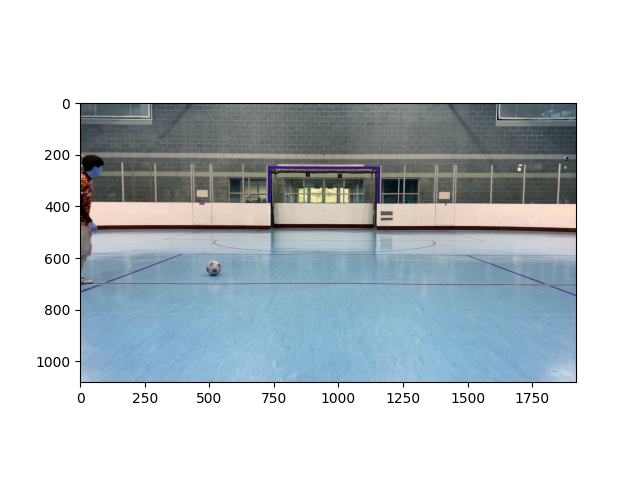

you clicked MouseButton.LEFT 729.2638185562623 481.04385080645125
you clicked MouseButton.LEFT 730.6463070355251 244.63832085253443
you clicked MouseButton.LEFT 1155.0702701691655 246.02080933179695
you clicked MouseButton.LEFT 1152.30529321064 481.04385080645125
you clicked MouseButton.LEFT 1500.6923899848334 586.1129752304143
you clicked MouseButton.LEFT 391.93662961617025 581.9655097926263
you clicked MouseButton.LEFT 506.68317339497213 481.04385080645125
you clicked MouseButton.LEFT 506.68317339497213 381.5046802995389


In [22]:
%matplotlib widget
# frame = input("Input the video you want to use (Select from 679, 687, 688, 689)")
im = cv2.imread("revised_videos/frames/0" + vid1 + "_frames/f0016.jpg")
# im = cv2.imread("revised_videos/frames/2363_frames/f0016.jpg")

coordinates = []
curr_background_kp_1 = "background_keypoints_angle1_" + vid1 + ".txt"


def on_click(event):
    coordinates.append((event.xdata, event.ydata))
    print('you clicked', event.button, event.xdata, event.ydata)

    if len(coordinates) == 8:
        f = open("background_keypoints_angle1_" + vid1 + ".txt", "w")
        for i in range(8):
            f.write(str(coordinates[i][0]) + "," + str(coordinates[i][1])+ "\n")

        fig.canvas.mpl_disconnect(cid)
    return coordinates

fig, ax = plt.subplots()
ax.imshow(im)

cid = fig.canvas.mpl_connect('button_press_event', on_click)

plt.show()

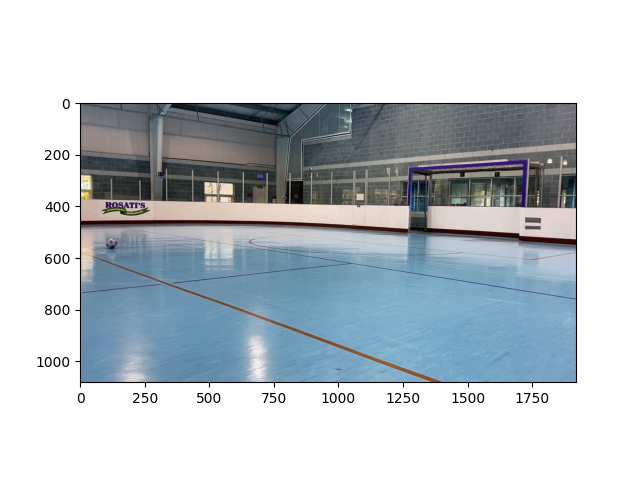

you clicked MouseButton.LEFT 1265.181014974625 496.51432649862454
you clicked MouseButton.LEFT 1274.393477389058 247.77784130893735
you clicked MouseButton.LEFT 1714.288557678227 227.04980087646345
you clicked MouseButton.LEFT 1698.1667484529696 531.0610605527477
you clicked MouseButton.LEFT 1044.0819170282364 616.2763378862517
you clicked MouseButton.LEFT 440.6656288828842 524.1517137419231
you clicked MouseButton.LEFT 1099.3566915148338 480.39251727336693
you clicked MouseButton.LEFT 1101.659807118442 395.17723993986306


In [23]:
%matplotlib widget
# frame = input("Input the video you want to use (Select from 679, 687, 688, 689)")
im = cv2.imread("revised_videos/frames/" + vid2 + "_frames/f0016.jpg")
# im = cv2.imread("revised_videos/frames/2363_frames/f0016.jpg")

coordinates = []

curr_background_kp_2 = "background_keypoints_angle2_" + vid1 + ".txt"

def on_click(event):
    coordinates.append((event.xdata, event.ydata))
    print('you clicked', event.button, event.xdata, event.ydata)

    if len(coordinates) == 8:
        f = open(curr_background_kp_2, "w")
        for i in range(8):
            f.write(str(coordinates[i][0]) + "," + str(coordinates[i][1])+ "\n")

        fig.canvas.mpl_disconnect(cid)
    return coordinates

fig, ax = plt.subplots()
ax.imshow(im)

cid = fig.canvas.mpl_connect('button_press_event', on_click)

plt.show()

In [24]:
def read_text(dir):
    f = open(dir, 'r')
    coordinates = np.zeros((8,2))
    for idx, line in enumerate(f):
        x, y = line.split(',')
        coordinates[idx][0] = float(x)
        coordinates[idx][1] = float(y)

    return coordinates

def create_match_text(dir1, dir2, output):
    coord1 = read_text(curr_background_kp_1)
    coord2 = read_text(curr_background_kp_2)
    
    match_coordinates = np.zeros((8,4))
    f = open(output, 'w')
    for i in range(8):
        f.write(str(coord1[i][0])+ " " + str(coord1[i][1])+ " " + str(coord2[i][0]) + " " + str(coord2[i][1])+ "\n")
        # x, y = line.split(',')
        # coordinates[idx][0] = float(x)
        # coordinates[idx][1] = float(y)

    return 


create_match_text(curr_background_kp_1, curr_background_kp_2, "custom_match.txt")

matches = np.loadtxt("custom_match.txt")

example_files/library: residual in frame 2 (non-normalized method) =  2841.4046374682466
example_files/library: residual in frame 1 (non-normalized method) =  6132.625993034322
example_files/library: residual combined   (non-normalized method) =  4487.015315251285
Fundamental matrix without normalization 
 [[ 6.65320797e-08  2.44174658e-06 -1.37175009e-03]
 [-9.29737061e-07 -2.02004480e-06 -1.51547954e-03]
 [ 4.56355615e-04  5.94015744e-04  1.00000000e+00]]

Fundamental matrix with normalization 
 [[ 2.26239811e-07  2.10645783e-06 -1.27428017e-03]
 [-6.10368876e-07 -1.80866399e-06 -1.31679606e-03]
 [ 2.79982944e-04  5.33162659e-04  9.67890619e-01]]
example_files/library: residual in frame 2 (normalized method) =  37.39259208768973
example_files/library: residual in frame 1 (normalized method) =  705.5412966435815
example_files/library: residual combined   (normalized method) =  371.46694436563564


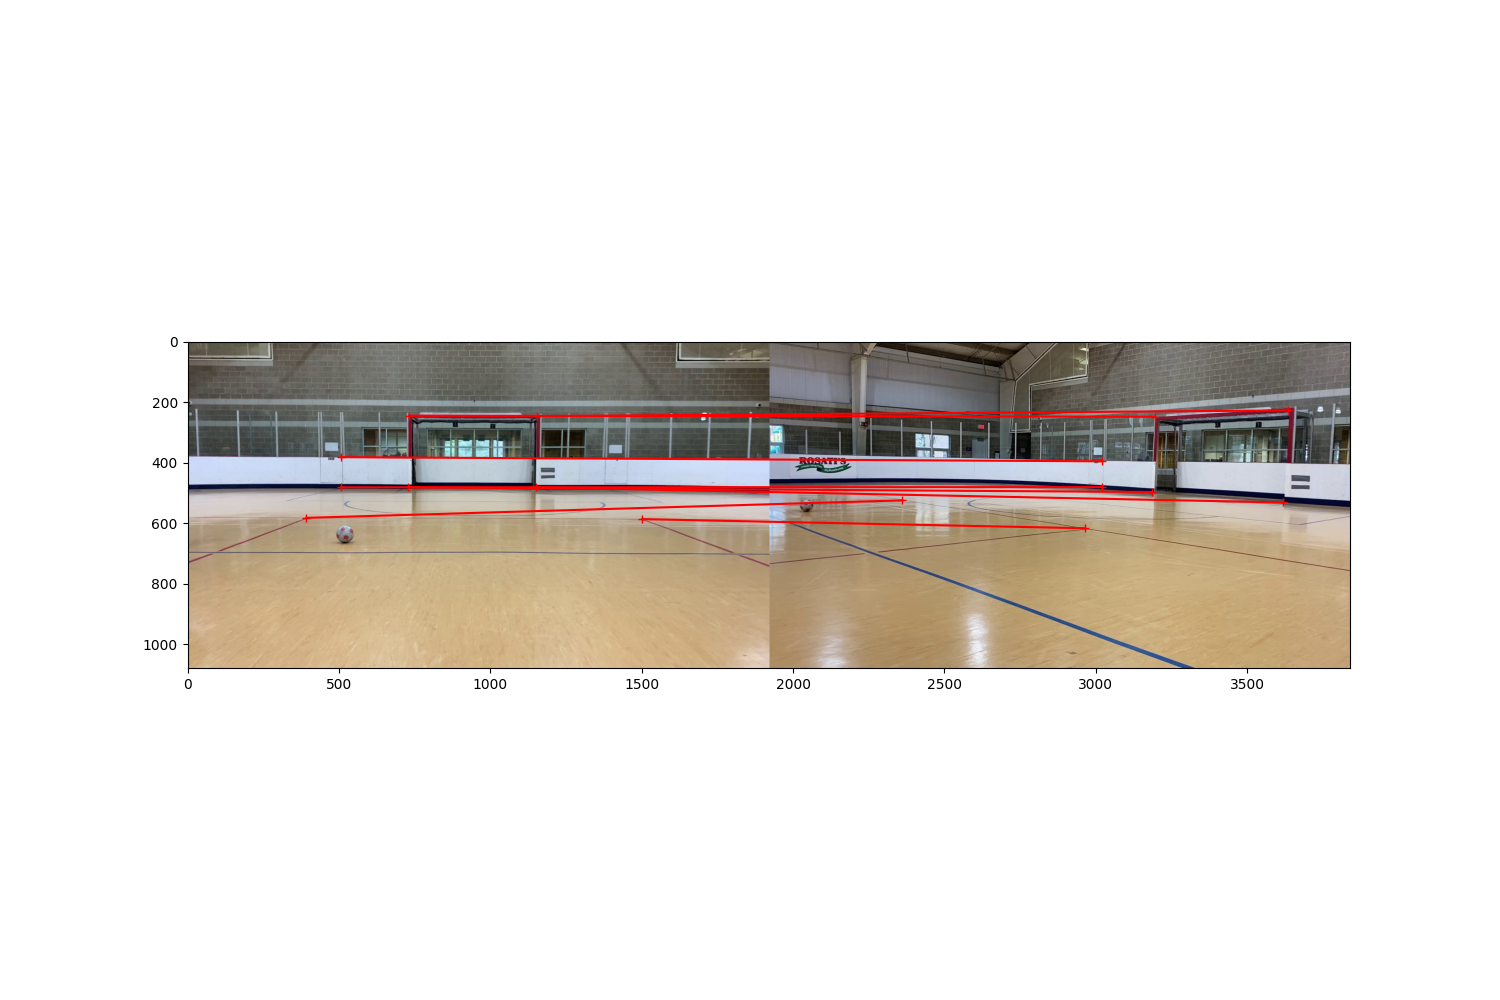

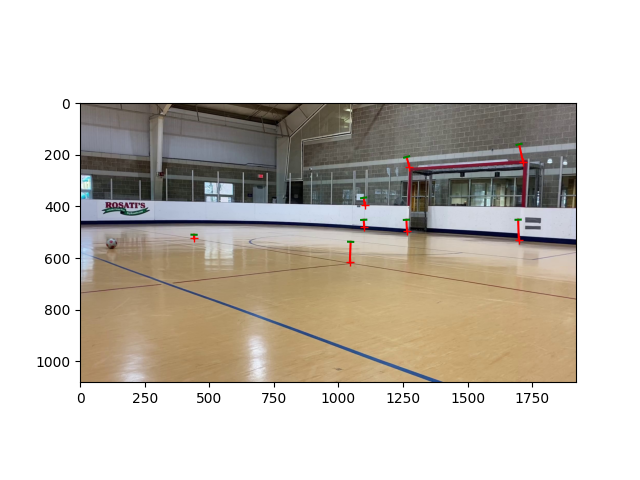

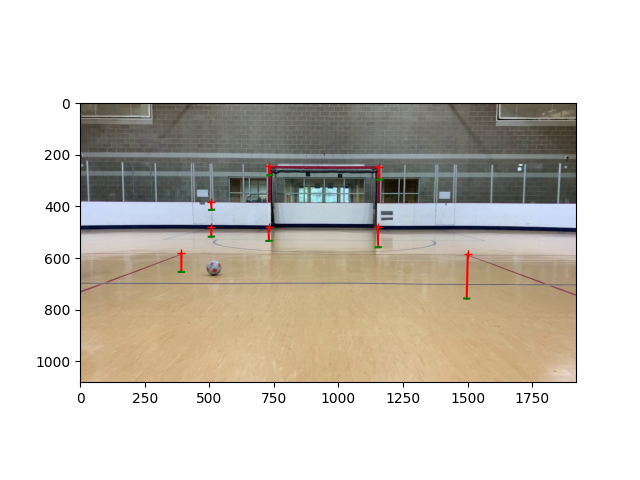

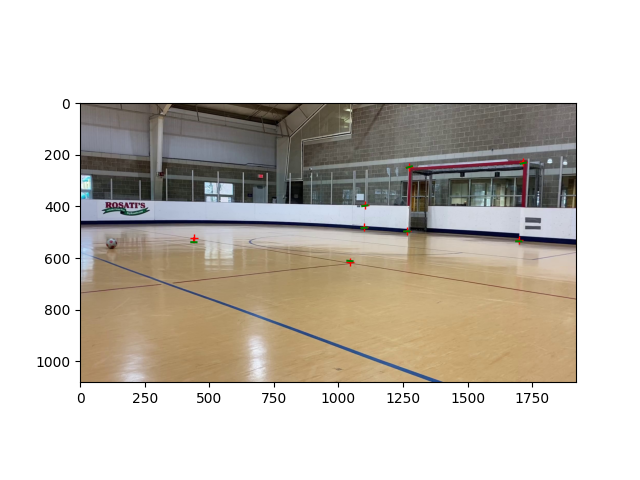

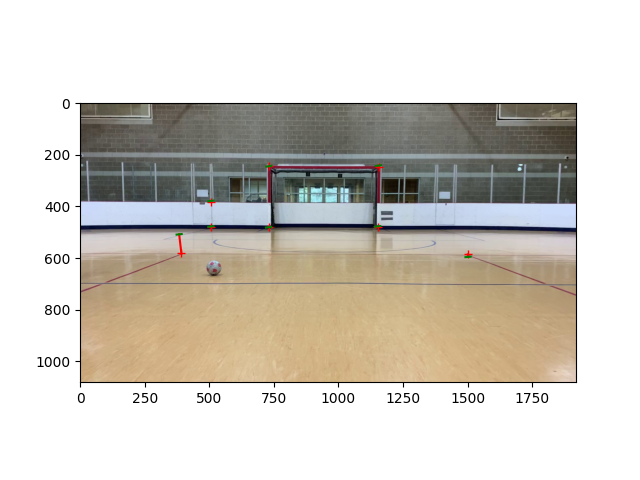

In [25]:
## Display two images side-by-side with matches
## this code is to help you visualize the matches, you don't need
## to use it to produce the results for the assignment
I3 = np.zeros((I1.size[1],I1.size[0]*2,3))
I3[:,:I1.size[0],:] = I1
I3[:,I1.size[0]:,:] = I2
fig, ax = plt.subplots(figsize=(15,10))
ax.set_aspect('equal')
ax.plot(matches[:,0],matches[:,1],  '+r')
ax.plot( matches[:,2]+I1.size[0],matches[:,3], '+r')
ax.plot([matches[:,0], matches[:,2]+I1.size[0]],[matches[:,1], matches[:,3]], 'r')
ax.imshow(np.array(I3).astype(np.uint8))

# non-normalized method
F = fit_fundamental(matches) # <YOUR CODE>
pt1_2d = matches[:, :2]
pt2_2d = matches[:, 2:]
v2 = get_residual(F, pt1_2d, pt2_2d)
v1 = get_residual(F.T, pt2_2d, pt1_2d)
print('{:s}: residual in frame 2 (non-normalized method) = '.format(name), v2)
print('{:s}: residual in frame 1 (non-normalized method) = '.format(name), v1)
print('{:s}: residual combined   (non-normalized method) = '.format(name), (v1+v2)/2)
# Plot epipolar lines in image I2
fig, ax = plt.subplots()
plot_fundamental(ax, F, pt1_2d, pt2_2d, I2)
# Plot epipolar lines in image I1
fig, ax = plt.subplots()
plot_fundamental(ax, F.T, pt2_2d, pt1_2d, I1)
print(f'Fundamental matrix without normalization \n {F}')

# normalized method
F = fit_fundamental_normalized(matches, I1.size, I2.size) # <YOUR CODE>
print("")
print(f'Fundamental matrix with normalization \n {F}')

pt1_2d = matches[:, :2]
pt2_2d = matches[:, 2:]
v2 = get_residual(F, pt1_2d, pt2_2d)
v1 = get_residual(F.T, pt2_2d, pt1_2d)
print('{:s}: residual in frame 2 (normalized method) = '.format(name), v2)
print('{:s}: residual in frame 1 (normalized method) = '.format(name), v1)
print('{:s}: residual combined   (normalized method) = '.format(name), (v1+v2)/2)
# Plot epipolar lines in image I2
fig, ax = plt.subplots()
plot_fundamental(ax, F, pt1_2d, pt2_2d, I2)
# Plot epipolar lines in image I1
fig, ax = plt.subplots()
plot_fundamental(ax, F.T, pt2_2d, pt1_2d, I1)

#### Part 3: Finding key metrics such as Fundamental Matrix and Camera Projection Matrix

In [26]:
def evaluate_points(M, points_2d, points_3d):
    """
    Visualize the actual 2D points and the projected 2D points calculated from
    the projection matrix
    You do not need to modify anything in this function, although you can if you
    want to
    :param M: projection matrix 3 x 4
    :param points_2d: 2D points N x 2
    :param points_3d: 3D points N x 3
    :return:
    """
    N = len(points_3d)
    points_3d = np.hstack((points_3d, np.ones((N, 1))))
    points_3d_proj = np.dot(M, points_3d.T).T
    u = points_3d_proj[:, 0] / points_3d_proj[:, 2]
    v = points_3d_proj[:, 1] / points_3d_proj[:, 2]
    residual = np.sum(np.hypot(u-points_2d[:, 0], v-points_2d[:, 1]))
    points_3d_proj = np.hstack((u[:, np.newaxis], v[:, np.newaxis]))
    return points_3d_proj, residual

# Write your code here for camera calibration (lab)
def camera_calibration(matches, pts_3d):
    """
    write your code to compute camera matrix
    """
    # <YOUR CODE>
    #matches 20 by 4
    #pts_3d 20 by 3

    #[0,0,0,x,y,z,-xy',-yy',-zy']
    #[x,y,z,0,0,0,-xx',-yx',-zx']

    first = np.array([0, 0, 0, 0, pts_3d[0, 0], pts_3d[0, 1], pts_3d[0, 2], 1, -matches[0, 1]*pts_3d[0, 0], -matches[0, 1]*pts_3d[0, 1], -matches[0, 1]*pts_3d[0, 2], -matches[0, 1]])
    second = np.array([pts_3d[0, 0], pts_3d[0, 1], pts_3d[0, 2], 1, 0, 0, 0, 0, -matches[0, 0]*pts_3d[0, 0], -matches[0, 0]*pts_3d[0, 1], -matches[0, 0]*pts_3d[0, 2], -matches[0, 0]])
    A = np.r_[[first], [second]]
    
    for n in range(1, matches.shape[0]):
        first = np.array([0, 0, 0, 0, pts_3d[n, 0], pts_3d[n, 1], pts_3d[n, 2], 1, -matches[n, 1]*pts_3d[n, 0], -matches[n, 1]*pts_3d[n, 1], -matches[n, 1]*pts_3d[n, 2], -matches[n, 1]])
        second = np.array([pts_3d[n, 0], pts_3d[n, 1], pts_3d[n, 2], 1, 0, 0, 0, 0, -matches[n, 0]*pts_3d[n, 0], -matches[n, 0]*pts_3d[n, 1], -matches[n, 0]*pts_3d[n, 2], -matches[n, 0]])
        A = np.r_[A, [first], [second]]

    u_, sig_, vt_ = np.linalg.svd(A)

    v = vt_[-1, :]
    v /= v[-1]

    return v.reshape(3,4)

    pass


# Load 3D points, and their corresponding locations in 
# the two images.
pts_3d = np.loadtxt('./futsal_court3d.txt')
matches = np.loadtxt('./custom_match.txt')

# <YOUR CODE> print lab camera projection matrices:
camera_proj1 = camera_calibration(matches[:, :2], pts_3d)
camera_proj2 = camera_calibration(matches[:, 2:], pts_3d)
print('camera 1 camera projection')
print(camera_proj1)

print('')
print('camera 2 camera projection')
print(camera_proj2)

# <YOUR CODE> evaluate the residuals for both estimated cameras
_, camera1_res = evaluate_points(camera_proj1, matches[:, :2], pts_3d)
print('residuals between the observed 2D points and the projected 3D points:')
print('residual in camera1:', camera1_res)
_, camera2_res = evaluate_points(camera_proj2, matches[:, 2:], pts_3d)
print('residual in camera2:', camera2_res)

camera 1 camera projection
[[-8.55430864e+00 -4.74740976e+00 -7.61280466e-02  8.59208669e+02]
 [-2.39736366e-01 -2.01518337e+00  7.54027209e+00  1.04831668e+02]
 [-5.06859741e-04 -5.14561640e-03  1.32810930e-05  1.00000000e+00]]

camera 2 camera projection
[[-6.74931010e+01 -2.43066125e+02  3.97349228e+00  8.70793648e+04]
 [ 2.99657196e+01 -4.17353160e+01  2.09365438e+02 -4.94102650e+03]
 [ 8.70988547e-02 -9.46501967e-02  9.37658034e-03  1.00000000e+00]]
residuals between the observed 2D points and the projected 3D points:
residual in camera1: 25.60173354496453
residual in camera2: 21.513555207710496


In [27]:
# Write your code here for computing camera centers
def calc_camera_center(camera_projection):
    """
    write your code to get camera center in the world 
    from the projection matrix
    """
    # <YOUR CODE>

    #camera center is the nullspace of the camera projection matrix 
    u,s,vt = np.linalg.svd(camera_projection)

    return vt[-1] / vt[-1,-1]
    pass

# <YOUR CODE> compute the camera centers using 
# the projection matrices
camera1_c = calc_camera_center(camera_proj1)
camera2_c = calc_camera_center(camera_proj2)
print('lab1 camera center', camera1_c)
print('lab2 camera center', camera2_c)

lab1 camera center [ -8.25602208 195.25154465  38.01676184   1.        ]
lab2 camera center [287.62268401 279.01056837  38.05212603   1.        ]


#### Part 4: Triangulating the keypoints using the camera projection matrix

In [28]:
def triangulation(matches, proj_m1, proj_m2):
    """
    write your code to triangulate the points in 3D
    """
    # <YOUR CODE>
    #take in matches which is an N by 4 matrix, where N is the number of matched points, and along the row 
    #it is ordered as x1, y1, x2, y2 where 1 and 2 means image 1 and image 2
    # x1 cross P1@X --> A1 = [x1]P1
    # x2 cross P2@X --> A2 = [x2]P2 
    #...objective is to find big X or where the original point in 3D is

    #where x1 is the points in image 1 and x2 is the points in image 2
    #using linear approach
    first_points = np.c_[matches[:, :2], np.ones((matches[:, :2].shape[0], 1))] #N by 3
    second_points = np.c_[matches[:, 2:], np.ones((matches[:, :2].shape[0], 1))] #N by 3

    estimated_3d_pts = []
    for n in range(matches.shape[0]):
        x1 = matches[n, 0] # 1 x 1
        y1 = matches[n, 1] # 1 x 1
        p11 = proj_m1[0, :]
        p12 = proj_m1[1, :] # 1 x 4    
        p13 = proj_m1[2, :] # 1 x 4
        x1p3 = x1*p13 # 1 x 4
        y1p3 = y1*p13 # 1 x 4
        equation1 = y1p3 - p12 # 1 x 4
        equation2 = p11 - x1p3 # 1 x 4
        
        # second_points
        x2 = matches[n, 2]
        y2 = matches[n, 3]
        p21 = proj_m2[0, :]
        p22 = proj_m2[1, :] # 1 x 4    
        p23 = proj_m2[2, :] # 1 x 4
        x2p3 = x2*p23 # 1 x 4
        y2p3 = y2*p23 # 1 x 4
        equation3 = y2p3 - p22 # 1 x 4
        equation4 = p21 - x2p3 # 1 x 4
        A = np.r_[[equation1], [equation2], [equation3], [equation4]]
        u_, s_, vt_ = np.linalg.svd(A)

        v = vt_[-1] / vt_[-1, -1]

        estimated_3d_pts.append(list(v[:3]))

    #return X 
    return np.array(estimated_3d_pts)

def evaluate_points_3d(ground_truth, estimated):
    """
    write your code to evaluate the triangulated 3D points
    """
    # <YOUR CODE>
    return np.sqrt(np.sum(np.square(ground_truth - estimated), axis=1))

(8, 4)
Mean 3D reconstuction error for the lab data:  1.11242
2D reprojection error for the lab 1 data:  24.07407227364657
2D reprojection error for the lab 2 data:  0.03235504337485173


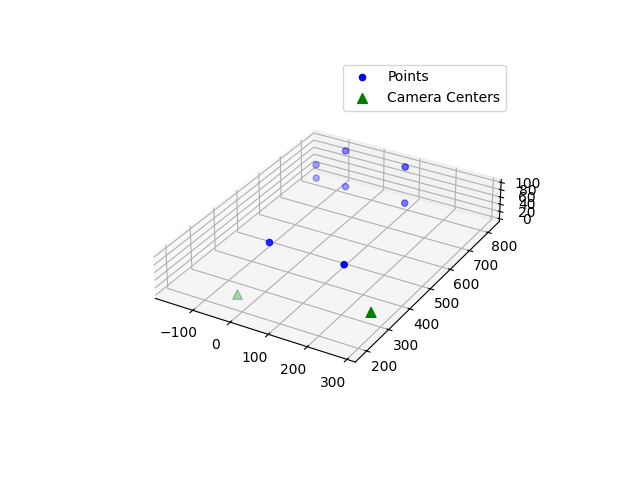

In [29]:
%matplotlib widget
# 3D point cloud for our background key points after triangulation creating point cloud
matches_custom = np.loadtxt('./custom_match.txt')
print(matches_custom.shape)
points_3d_gt = np.loadtxt('./futsal_court3d.txt')
points_3d_custom = triangulation(matches_custom, camera_proj1, camera_proj2) # <YOUR CODE>
res_3d_lab = evaluate_points_3d(points_3d_gt, points_3d_custom) # <YOUR CODE>
print('Mean 3D reconstuction error for the lab data: ', round(np.mean(res_3d_lab), 5))

custom_pt1 = matches_custom[:, :2]
custom_pt2 = matches_custom[:, 2:]
_, res_2d_custom1 = evaluate_points(camera_proj1, custom_pt1, points_3d_custom)
_, res_2d_custom2 = evaluate_points(camera_proj2, custom_pt2, points_3d_custom)
print('2D reprojection error for the lab 1 data: ', np.mean(res_2d_custom1))
print('2D reprojection error for the lab 2 data: ', np.mean(res_2d_custom2))
# point cloud visualized
camera_centers = np.vstack((camera1_c, camera2_c))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_3d_custom[:, 0], points_3d_custom[:, 1], points_3d_custom[:, 2], c='b', label='Points')
ax.scatter(camera_centers[:, 0], camera_centers[:, 1], camera_centers[:, 2], c='g', s=50, marker='^', label='Camera Centers')
ax.legend(loc='best')
ax.set_aspect('equal')

In [30]:
import json 
def load_keypoints(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
    return [np.array(frame['keypoints'][0]) for frame in data if frame['keypoints']]


In [31]:
json_file1 = 'revised_videos/keypoints/IMG_0' + vid1 + '.json'
json_file2 = 'revised_videos/keypoints/IMG_' + vid2 + '.json'
keypoints1 = load_keypoints(json_file1)
keypoints2 = load_keypoints(json_file2)
pose3d = [] 
num_frames = min(len(keypoints1), len(keypoints2))
print(f"frame number is {num_frames}")
for f in range(num_frames):
    pose_keypoint_matches = np.c_[keypoints1[f], keypoints2[f]]
    pose3d.append(triangulation(pose_keypoint_matches, camera_proj1, camera_proj2))

#pose3d should have the shape (#frame, 17, 3)

frame number is 105


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# Write your code here for triangulation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

Display the animation in just one frame

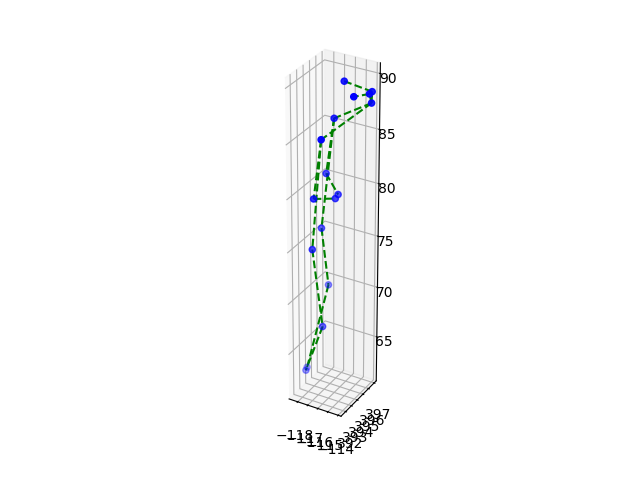

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
frame = 10
ax.scatter(pose3d[frame][:, 0], pose3d[frame][:, 1], pose3d[frame][:, 2], c='b', label='Points')
connections = [(0,1), (1,3), (0,2), (2,4), (0,5), (0,6), (5,7), (7,9), (6,8), (8,10), 
(5,11), (11,13), (13,15), (6,12), (12,14), (14,16)]

for start_idx, end_idx in connections:
    start_point = pose3d[frame][start_idx]
    end_point = pose3d[frame][end_idx]
    ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], [start_point[2], end_point[2]], color='green', linestyle='--')

ax.set_aspect('equal')

#### Part 5 Final Results and Visualization (Note there may be some index out of bounds error but this does not affect the visualization, at least when we are running it)

/tmp/ipykernel_12962/2782649608.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


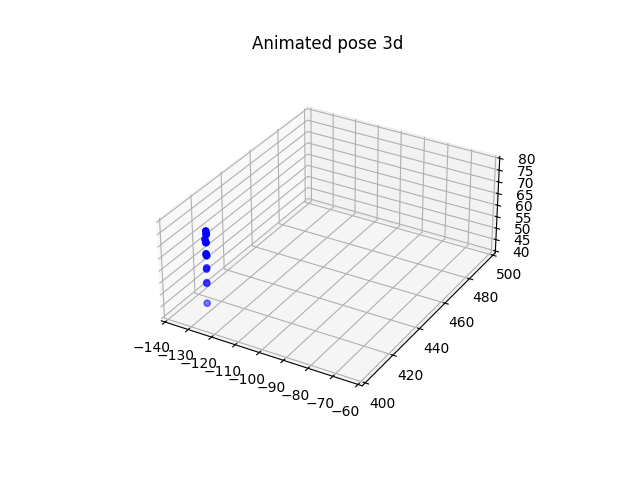

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Generate some sample data for demonstration
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initial frame
frame = 0
scat = ax.scatter(pose3d[frame][:, 0], pose3d[frame][:, 1], pose3d[frame][:, 2], c='b', label='Points')

# Define connections between points
connections = [(0, 1), (1, 3), (0, 2), (2, 4), (0, 5), (0, 6), (5, 7), (7, 9), (6, 8), (8, 10), 
               (5, 11), (11, 13), (13, 15), (6, 12), (12, 14), (14, 16)]

lines = [ax.plot([], [], [], color='green', linestyle='--')[0] for _ in range(len(connections))]

def update(frame):
    scat._offsets3d = (pose3d[frame][:, 0], pose3d[frame][:, 1], pose3d[frame][:, 2])
    for i, (start_idx, end_idx) in enumerate(connections):
        start_point = pose3d[frame][start_idx]
        end_point = pose3d[frame][end_idx]
        lines[i].set_data([start_point[0], end_point[0]], [start_point[1], end_point[1]])
        lines[i].set_3d_properties([start_point[2], end_point[2]])
    return scat, lines

x_min, x_max = -140, -60
y_min, y_max = 400, 500
z_min, z_max = 40, 80

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_zlim([z_min, z_max])
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
ax.set_title('Animated pose 3d')
ax.set_aspect('equal')
ani = FuncAnimation(fig, update, frames=100, interval=50)
plt.show()
ani.save('3d_pose_prototype' + vid1 + '_' + vid2 + '.mp4', writer='ffmpeg', fps=20)

#### Part 6: Post processing analysis

In [61]:
import json

kp_file = open("keypoints_data.json")
data = json.load(kp_file)
coord = data[0]['keypoints']


25

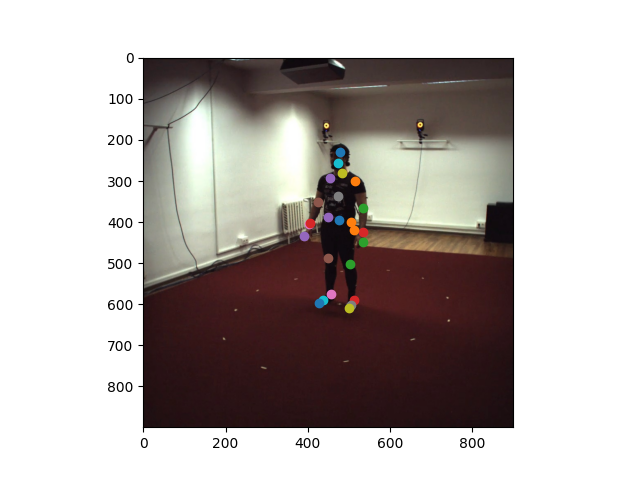

In [66]:
%matplotlib widget
im = cv2.imread("frame_0000.jpg")
fig, ax = plt.subplots()
ax.imshow(im)

for c in coord:
    plt.plot(c[0], c[1], 'o')

connections = [(0,1), (1,2), (2,3), (0,4), (4,5), (5,6), (0,7), (7,8), (8,11), (11,12), (12,13), (8,14), (14,15), (15,16), (8,9), (9,10), (3,17), (17,18), (6,19), (19,20), (13,21), (21,22), (16,23), (23,24)]

for start_idx, end_idx in connections:
    start_point = coord[start_idx]
    end_point = coord[end_idx]
    ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], [start_point[2], end_point[2]], color='green', linestyle='--')
# i = 17
# plt.plot(coord[i][0], coord[i][1], 'o')
plt.show()